<a href="https://colab.research.google.com/github/sarthakkaushik/BERT/blob/main/Rotten_Tomato_Movie_Sentiment_Using_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Code to mount google drive in case you are loading the data from your google drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
#Changing Working Directory
import os
 
# Function to Get the current
# working directory
def current_path():
    print("Current working directory before")
    print(os.getcwd())
    print()
 
 
# Driver's code
# Printing CWD before


current_path()
 
# Changing the CWD
data_path = '/gdrive/MyDrive/Machine Learning Datasets/sentiment-analysis-on-movie-reviews/train.tsv'
os.chdir(data_path)
 
# Printing CWD after
current_path()

Current working directory before
/gdrive

Current working directory before
/gdrive/My Drive/Machine Learning Datasets/sentiment-analysis-on-movie-reviews/train.tsv



In [3]:
#Reading the data
import pandas as pd
df=pd.read_csv('train.tsv', sep='\t')

In [4]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [5]:
df['Sentiment'].describe()

count    156060.000000
mean          2.063578
std           0.893832
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: Sentiment, dtype: float64

In [6]:
#We need to remove duplicate using SentecneID
df.drop_duplicates(subset='SentenceId',keep='first',inplace = True)

In [7]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
63,64,2,"This quiet , introspective and entertaining in...",4
81,82,3,"Even fans of Ismail Merchant 's work , I suspe...",1
116,117,4,A positively thrilling combination of ethnogra...,3
156,157,5,Aggressive self-glorification and a manipulati...,1


In [8]:
len(df['Phrase'][0].split(' '))

37

In [9]:
#we will create a list to fing the max list of words in a given sentence
Seqword=df['Phrase'].apply(lambda x: len(x.split()))

In [10]:
# Finding max Length
max(Seqword)

import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


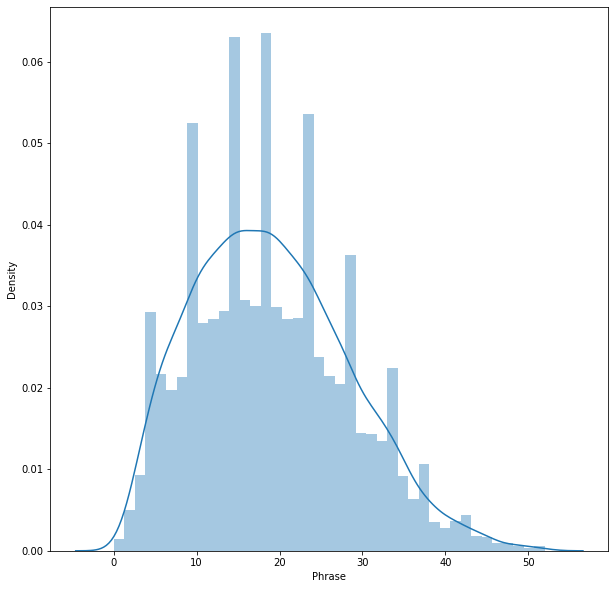

In [11]:
plt.figure(figsize=(10,10))
sns.distplot(Seqword)

In [12]:
SEQ_Len=50

#Tokenization

In [13]:
# Now we will tokenize our Pharse using tranformer library 
!pip install transformers

     |████████████████████████████████| 3.4 MB 6.8 MB/s 
     |████████████████████████████████| 3.3 MB 64.2 MB/s 
     |████████████████████████████████| 596 kB 40.1 MB/s 
     |████████████████████████████████| 61 kB 583 kB/s 
     |████████████████████████████████| 895 kB 72.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [14]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

tokens=tokenizer.encode_plus('Hello World', max_length=SEQ_Len, truncation=True, padding='max_length', add_special_tokens=True,
                             return_token_type_ids=False,
                             return_attention_mask=True,
                             return_tensors='tf'

                             )


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [15]:
tokens

{'input_ids': <tf.Tensor: shape=(1, 50), dtype=int32, numpy=
array([[ 101, 7592, 2088,  102,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 50), dtype=int32, numpy=
array([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=int32)>}

In [16]:
# Now will do this for each and every sentence we have in our dataset.
# We will create 2 numpy array of size(n,m), n= len of our orignal df and m =SEQ_len
# The two array will store the information of our inputs ids and our attention mask id

In [17]:
import numpy as np

Xids=np.zeros((len(df),SEQ_Len))
Xmask=np.zeros((len(df),SEQ_Len))


In [18]:
Xids.shape

(8529, 50)

In [19]:
#Looping over each phrase and savin it numpy array

for i,sent in enumerate(df['Phrase']):
  tokens=tokenizer.encode_plus(sent, max_length=SEQ_Len, truncation=True, padding='max_length', add_special_tokens=True,
                             return_token_type_ids=False,
                             return_attention_mask=True,
                             return_tensors='tf'

                             )
  Xids[i,:],Xmask[i,:]=tokens['input_ids'],tokens['attention_mask']


In [20]:
Xids

array([[ 101., 1037., 2186., ...,    0.,    0.,    0.],
       [ 101., 2023., 4251., ...,    0.,    0.,    0.],
       [ 101., 2130., 4599., ...,    0.,    0.,    0.],
       ...,
       [ 101., 1011., 1048., ...,    0.,    0.,    0.],
       [ 101., 1996., 3185., ...,    0.,    0.,    0.],
       [ 101., 1996., 2143., ...,    0.,    0.,    0.]])

In [21]:
Xmask

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

Creating 1Hot encoding for the labels value

In [22]:
arr = df['Sentiment'].values  # take sentiment column in df as array
labels = np.zeros((arr.size, arr.max()+1))  # initialize empty (all zero) label array
labels[np.arange(arr.size), arr] = 1  # add ones in indices where we have a value

In [23]:
labels

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [24]:
with open('reviews-xids.npy', 'wb') as f:
    np.save(f, Xids)
with open('reviews-xmask.npy', 'wb') as f:
    np.save(f, Xmask)
with open('reviews-labels.npy', 'wb') as f:
    np.save(f, labels)

Now we have all of the encoded arrays, we load them into a TensorFlow dataset object. Using the dataset, we easily restructure, shuffle, and batch the data.

In [25]:
import tensorflow as tf

BATCH_SIZE = 32  # we will use batches of 32

# load arrays into tensorflow dataset
dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))

# create a mapping function that we use to restructure our dataset
def map_func(input_ids, masks, labels):
    return {'input_ids': input_ids, 'attention_mask': masks}, labels

# using map method to apply map_func to dataset
dataset = dataset.map(map_func)

# shuffle data and batch it
dataset = dataset.shuffle(100000).batch(BATCH_SIZE)

#Train-validation split

In [26]:
# get the length of the batched dataset
DS_LEN = len([0 for batch in dataset])
SPLIT = 0.9  # 90-10 split

train = dataset.take(round(DS_LEN*SPLIT))  # get first 90% of batches
val = dataset.skip(round(DS_LEN*SPLIT))  # skip first 90% and keep final 10%

# del dataset  # optionally, delete dataset to free up disk-space


#Model definition
Our data is now ready and we can define our model architecture. We will use BERT, followed by an LSTM layer, and some simple NN layers. Those final layers following BERT are our classifier.
Our classifier consumes the output hidden state tensors from BERT — using them to predict whether we’re seeing something with positive or negative sentiment.

In [30]:
from transformers import TFAutoModel,TFBertModel

# initialize cased BERT model
bert = TFBertModel.from_pretrained('bert-base-cased')

input_ids = tf.keras.layers.Input(shape=(50,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(50,), name='attention_mask', dtype='int32')

# we consume the last_hidden_state tensor from bert (discarding pooled_outputs)
embeddings = bert(input_ids, attention_mask=mask)[0]

X = tf.keras.layers.LSTM(64)(embeddings)
X = tf.keras.layers.BatchNormalization()(X)
X = tf.keras.layers.Dense(64, activation='relu')(X)
X = tf.keras.layers.Dropout(0.1)(X)
y = tf.keras.layers.Dense(5, activation='softmax', name='outputs')(X)

# define input and output layers of our model
model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)

# freeze the BERT layer - otherwise we will be training 100M+ parameters...
model.layers[2].trainable = False

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


#Training

In [31]:
optimizer = tf.keras.optimizers.Adam(0.01)
loss = tf.keras.losses.CategoricalCrossentropy()  # categorical = one-hot
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[acc])

history = model.fit(train, validation_data=val, epochs=140)

Epoch 1/40
240/240 [==============================] - 40s 105ms/step - loss: 1.6065 - accuracy: 0.2688 - val_loss: 1.5773 - val_accuracy: 0.2756
Epoch 2/40
240/240 [==============================] - 22s 93ms/step - loss: 1.5599 - accuracy: 0.2895 - val_loss: 1.5573 - val_accuracy: 0.2744
Epoch 3/40
240/240 [==============================] - 22s 92ms/step - loss: 1.5571 - accuracy: 0.2829 - val_loss: 1.5607 - val_accuracy: 0.2909
Epoch 4/40
240/240 [==============================] - 22s 92ms/step - loss: 1.5556 - accuracy: 0.2904 - val_loss: 1.7539 - val_accuracy: 0.2132
Epoch 5/40
240/240 [==============================] - 22s 92ms/step - loss: 1.5536 - accuracy: 0.2943 - val_loss: 1.5467 - val_accuracy: 0.3133
Epoch 6/40
240/240 [==============================] - 22s 92ms/step - loss: 1.5545 - accuracy: 0.2887 - val_loss: 1.7374 - val_accuracy: 0.2438
Epoch 7/40
240/240 [==============================] - 22s 92ms/step - loss: 1.5495 - accuracy: 0.2923 - val_loss: 1.5367 - val_accuracy